In [14]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import datasets
import matplotlib.pyplot as plt


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bostonhoustingmlnd/housing.csv


In [22]:
df = pd.read_csv('../input/bostonhoustingmlnd/housing.csv')

In [23]:
df.head()


,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


**Creating feature and target arrays**

In [24]:
X = df.drop('MEDV',axis=1).values
y = df['MEDV'].values

**Predicting house value from a single feature**


In [27]:
X_rooms = X[:,2]

In [28]:
y = y.reshape(-1,1)
X_rooms = X_rooms.reshape(-1,1)


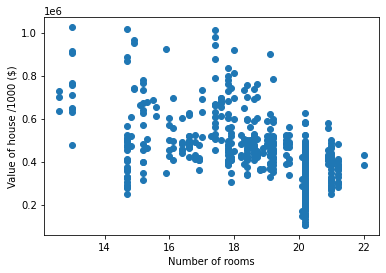

In [29]:
plt.scatter(X_rooms,y)
plt.ylabel('Value of house /1000 ($)')
plt.xlabel('Number of rooms')
plt.show()

**Fitting a regression model**

In [30]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_rooms,y)
prediction_space = np.linspace(min(X_rooms),max(X_rooms)).reshape(-1,1)

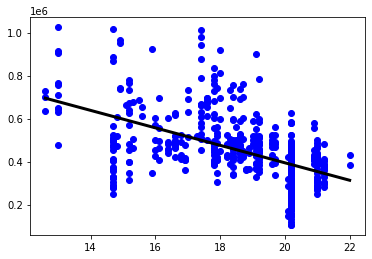

In [31]:
plt.scatter(X_rooms,y,color='blue')
plt.plot(prediction_space,reg.predict(prediction_space),color='black',linewidth=3)
plt.show()

In [46]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=42)
reg_all = LinearRegression()
reg_all.fit(X_train,y_train)
y_pred = reg_all.predict(X_test)
reg_all.score(X_test,y_test)


0.6910052678184777

**Cross Validation in scikit-learn**

In [47]:
from sklearn.model_selection import cross_val_score
cv_results = cross_val_score(reg,X,y,cv=5)
print(cv_results)
np.mean(cv_results)

[0.75606189 0.63862669 0.39700546 0.28794665 0.03922698]


0.4237735326662303